<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Image-Classification-My-Model/blob/main/SVM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [15]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:

tf.__version__

'2.9.2'

In [17]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [18]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [19]:

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [20]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## For Binary Classification
#cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='linear')

## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))




In [22]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

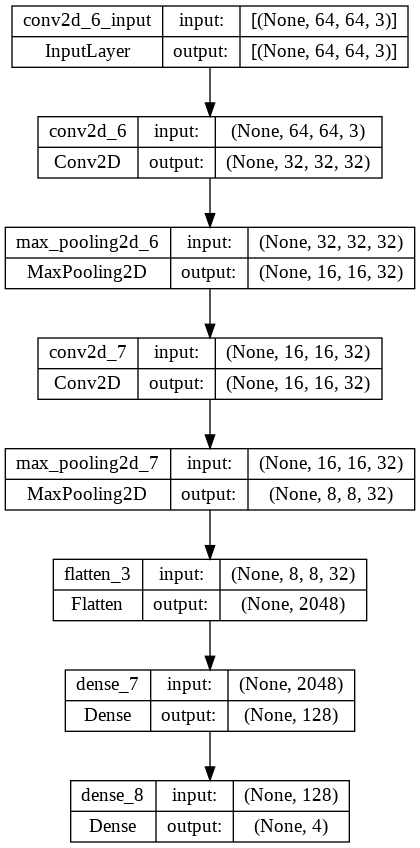

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model = cnn,show_shapes = True)

In [27]:

# Part 3 - Training the CNN

# Compiling the CNN
#cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])



In [28]:
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [29]:
# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
150/150 [==============================] - 1445s 10s/step - loss: 1.1999 - accuracy: 0.5458 - val_loss: 1.1591 - val_accuracy: 0.5808
Epoch 2/10
150/150 [==============================] - 56s 373ms/step - loss: 1.0232 - accuracy: 0.7469 - val_loss: 1.0449 - val_accuracy: 0.7017
Epoch 3/10
150/150 [==============================] - 55s 366ms/step - loss: 0.9708 - accuracy: 0.8033 - val_loss: 1.0286 - val_accuracy: 0.7233
Epoch 4/10
150/150 [==============================] - 57s 377ms/step - loss: 0.9469 - accuracy: 0.8250 - val_loss: 1.0255 - val_accuracy: 0.7325
Epoch 5/10
150/150 [==============================] - 54s 363ms/step - loss: 0.9325 - accuracy: 0.8360 - val_loss: 1.0059 - val_accuracy: 0.7550
Epoch 6/10
150/150 [==============================] - 55s 369ms/step - loss: 0.9162 - accuracy: 0.8523 - val_loss: 1.0306 - val_accuracy: 0.7225
Epoch 7/10
150/150 [==============================] - 56s 375ms/step - loss: 0.9165 - accuracy: 0.8469 - val_loss: 0.9797 - val_ac

In [30]:

acc = cnn.evaluate(test_set,steps = len(test_set),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 9s - loss: 0.9991 - accuracy: 0.7525 - 9s/epoch - 232ms/step
75.25


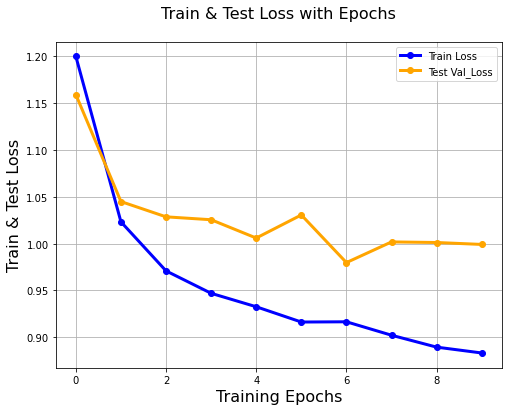

In [31]:
# plot the loss
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.plot(r.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

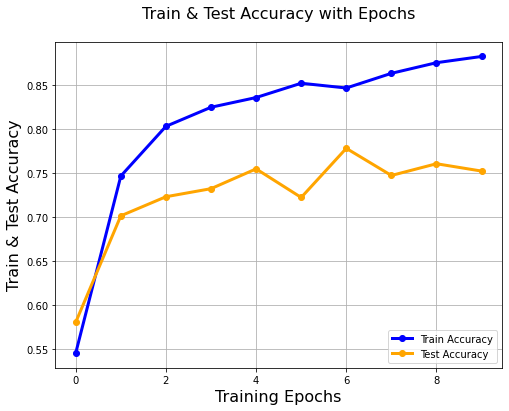

In [32]:
# plot the acquracy
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.plot(r.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [33]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/My project/part one/my_model.h5')

In [34]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/My project/part one/my_model.h5')

In [35]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [42]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/tilapia1.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)

list_index = [0,1,2,3]

x = result

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(result[0][list_index[i]] * 100,2),'%')






1/1 [==============================] - 0s 21ms/step
[[2.4549637e-04 2.8103516e-03 5.2112021e-12 9.9694413e-01]]
[3, 1, 0, 2]
Tilapia_Fish : 99.69 %
Hilsha_Fish : 0.28 %
Barbel_Fish : 0.02 %
Spotted_Snakehead_Fish : 0.0 %
